In [589]:
import pandas as pd
import numpy as np

In [590]:
df = pd.read_csv('diabetes.csv')

In [591]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# DATA CLEANING

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [593]:
#Identify number of missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Pregnancies

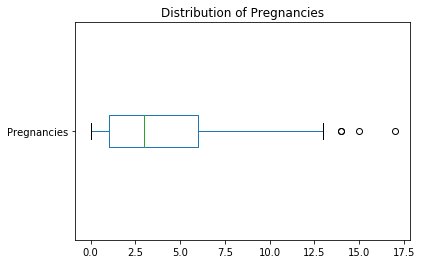

In [594]:
#Draw a boxplot and check for outliers in the Pregnancies column
df["Pregnancies"].plot.box(vert=False, title="Distribution of Pregnancies")

## Glucose

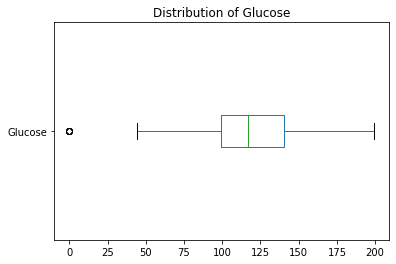

In [595]:
#Draw a boxplot and check for outliers in the Glucose column
df["Glucose"].plot.box(vert=False, title="Distribution of Glucose")

Obviously, glucose levels equal to zero are abnormal data and should be deleted

In [596]:
#Keep the rows where glucose does not equal 0
df = df[df["Glucose"] != 0]

## BloodPressure

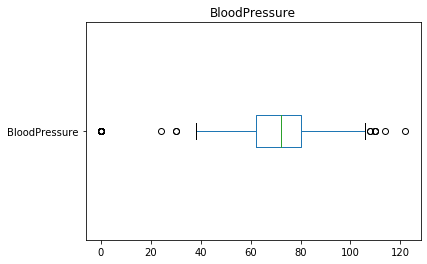

In [597]:
#Draw a boxplot and check for outliers in the BloodPressure column
df["BloodPressure"].plot.box(vert=False, title="BloodPressure")

Similarly, blood pressure equal to 0 is outlier and should be removed.

In [598]:
#Keep the rows where BloodPressure does not equal 0
df = df[df["BloodPressure"] != 0]

## SkinThickness

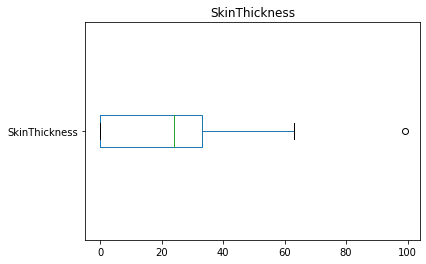

In [599]:
#Draw a boxplot and check for outliers in the SkinThickness  column
df["SkinThickness"].plot.box(vert=False, title="SkinThickness")

I have noticed that there are many values equal to 0 in the 'SkinThickness' column, which is clearly unreasonable. However, due to the large number of data points with values equal to 0, removing them might affect the sample size. Therefore, I have decided to replace the values equal to 0 with the average of the remaining data. I have also identified an outlier in the data that appears to be excessively large. Therefore, I will first remove this outlier.

In [600]:
#Keep the rows where SkinThickness less than 80
df = df[df["SkinThickness"] <= 80]

In [601]:
# Replace the 0 value in the "SkinThickness" column with NaN
df['SkinThickness'].replace(0, np.nan, inplace=True)

# Calculate the average of the SkinThickness column
mean_skin_thickness = df['SkinThickness'].mean()

# Populate NaN values with average values
df['SkinThickness'].fillna(mean_skin_thickness, inplace=True)


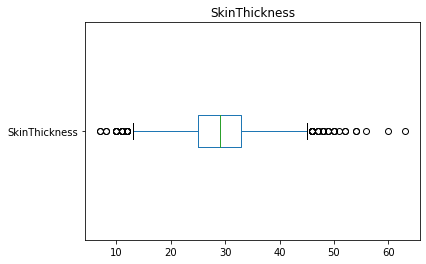

In [602]:
df["SkinThickness"].plot.box(vert=False, title="SkinThickness")

## Insulin

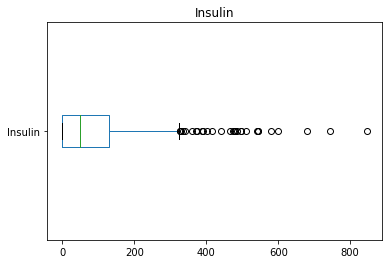

In [603]:
#Draw a boxplot and check for outliers in the Insulin  column
df["Insulin"].plot.box(vert=False, title="Insulin")

The situation with 'Insulin' is similar to 'SkinThickness,' with many values equal to zero. Upon observing the plot, I have also identified several outliers. Therefore, I have chosen to fill the zero values with the median to mitigate potential inaccuracies. Additionally, it is evident that some values are greater than 600, which may be data errors, so I have decided to remove values greater than 600.

In [604]:
#Keep the rows where Insulin less than 600
df = df[df["Insulin"] <= 600]

In [605]:
# Replace the 0 value in the "Insulin" column with NaN
df['Insulin'].replace(0, np.nan, inplace=True)

# Calculate the average of the SkinThickness column
median_insulin = df['Insulin'].median()

# Populate NaN values with median values
df['Insulin'].fillna(median_insulin, inplace=True)

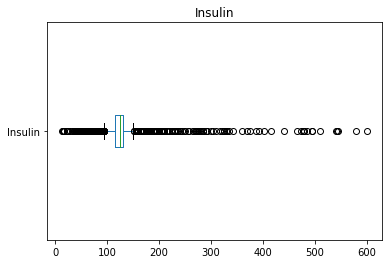

In [606]:
df["Insulin"].plot.box(vert=False, title="Insulin")

## BMI

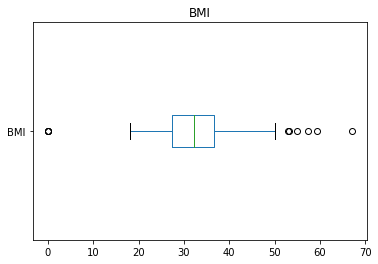

In [607]:
#Draw a boxplot and check for outliers in the BMI  column
df["BMI"].plot.box(vert=False, title="BMI")

In [608]:
#Keep the rows where BMI does not equal 0
df = df[df["BMI"] != 0]

## DiabetesPedigreeFunction

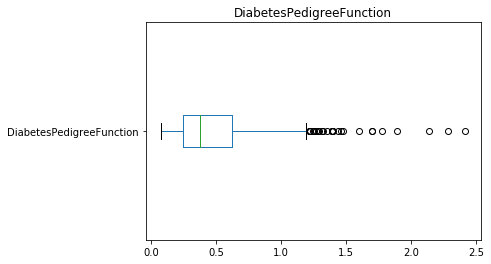

In [609]:
#Draw a boxplot and check for outliers in the DiabetesPedigreeFunction  column
df["DiabetesPedigreeFunction"].plot.box(vert=False, title="DiabetesPedigreeFunction")

## Age

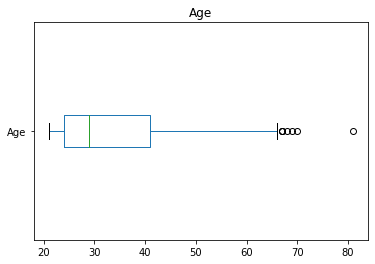

In [610]:
#Draw a boxplot and check for outliers in the Age  column
df["Age"].plot.box(vert=False, title="Age")

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               720 non-null    int64  
 1   Glucose                   720 non-null    int64  
 2   BloodPressure             720 non-null    int64  
 3   SkinThickness             720 non-null    float64
 4   Insulin                   720 non-null    float64
 5   BMI                       720 non-null    float64
 6   DiabetesPedigreeFunction  720 non-null    float64
 7   Age                       720 non-null    int64  
 8   Outcome                   720 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 56.2 KB


In [612]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt


In [613]:
# divide the data into feature sets and label sets
X = df.iloc[:,: -1].values
y = df.Outcome.values  

#Data normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 # Convert data to PyTorch tensors
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

In [614]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        # first hidden layer
        self.fc1 = nn.Linear(input_size, hidden_size1)  
        # Activation function of the first hidden layer
        self.relu1 = nn.ReLU()  
        # second hidden layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  
        # Activation function of the second hidden layer
        self.relu2 = nn.ReLU()  
        # output layer
        self.fc3 = nn.Linear(hidden_size2, output_size)  
        # Add Sigmoid activation function
        self.act = nn.Sigmoid() 

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.act(x) 
        return x



In [615]:
input_size = X_train.shape[1]
hidden_size1 = 24  
hidden_size2 = 16  
output_size = 2
l2_lambda = 0.01  

model = MLP(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()
l2_reg = nn.MSELoss()
# optimizer = optim.Adam(model.parameters())
optimizer = optim.SGD(model.parameters(), lr=0.1)


Epoch [10/100], Loss: 0.7536
Epoch [20/100], Loss: 0.7455
Epoch [30/100], Loss: 0.7378
Epoch [40/100], Loss: 0.7305
Epoch [50/100], Loss: 0.7233
Epoch [60/100], Loss: 0.7162


Epoch [70/100], Loss: 0.7091
Epoch [80/100], Loss: 0.7021
Epoch [90/100], Loss: 0.6952
Epoch [100/100], Loss: 0.6885


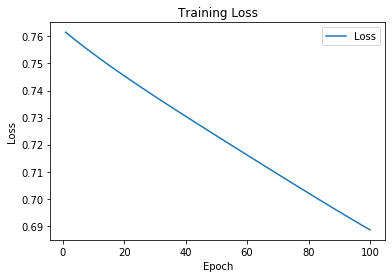

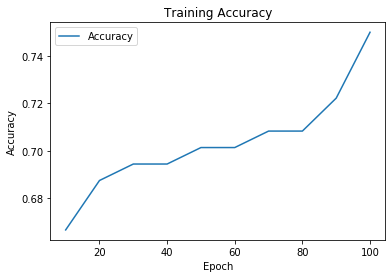

Accuracy on test data: 0.75


In [616]:
num_epochs = 100
loss_history = []  
accuracy_history = []  

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    #Add L2 regularization term
    l2_loss = 0
    for param in model.parameters():
        l2_loss += torch.norm(param, 2)

    # Add L2 regularization term to the loss
    loss = loss + l2_lambda * l2_loss  

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Calculate and save the accuracy rate every ten times
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            model.eval()
            y_pred = model(X_test)
            _, predicted = torch.max(y_pred, 1)
            correct = (predicted == y_test).sum().item()
            accuracy = correct / len(y_test)
            accuracy_history.append(accuracy)
        model.train()  

    loss_history.append(loss.item())

# Draw a loss line chart
plt.plot(range(1, num_epochs + 1), loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Draw an accuracy line chart
plt.plot(range(10, num_epochs + 1, 10), accuracy_history, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()


model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy on test data: {accuracy:.2f}')